# Install

In [ ]:
!pip3 install pshmodule

In [ ]:
!pip3 install pickle5

In [ ]:
!pip3 install pandas==1.5.0

In [ ]:
!pip3 install swifter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Load

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing']


In [ ]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import swifter
from pshmodule.utils import filemanager as fm

In [ ]:
df1 = fm.load(cfg.data_path_v1)
df2 = fm.load(cfg.data_path_v2)

extension : .xlsx
Loaded 21962 records from drive/MyDrive/MemeProject/data/row_data/meme_v1.xlsx
extension : .xlsx
Loaded 14640 records from drive/MyDrive/MemeProject/data/row_data/meme_v2.xlsx


In [ ]:
new_header = df1.iloc[1]
df1 = df1[2:]
df1.columns = new_header

Merge

In [ ]:
df1 = df1[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]
df2 = df2[['관리번호', 'utt',	'발화구분',	'대화소재', '화행(U)', '발화문',	'ARG1',	'ARG_op']]

In [ ]:
df2.head()

,관리번호,utt,발화구분,대화소재,화행(U),발화문,ARG1,ARG_op
0,Aa0001,1,U,학교생활,자랑,나 중간고사 반에서 1등했어,중간고사,NaN
1,Aa0001,2,U,학교생활,자랑,중간고사 점수 내가 반에서 제일 잘 받음,중간고사,NaN
2,Aa0001,3,U,학교생활,자랑,나 반에서 중간 성적 제일 좋아,중간,NaN
3,Aa0001,4,U,학교생활,자랑,우리 반에서 내가 시험 제일 잘 봤다,시험,NaN
4,Aa0001,5,U,학교생활,자랑,중간고사 반 1등 먹음,중간고사,NaN


In [ ]:
print(len(df1))
print(len(df2))

21960
14640


In [ ]:
df_A = df2[df2['관리번호'].str.startswith('A')]
df_E = df2[df2['관리번호'].str.startswith('E')]

In [ ]:
df = pd.concat([df_A, df1, df_E])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(36600, 8)

Numbering

In [ ]:
# no
num_list = [i+1 for i in range(len(df))]
df['num'] = num_list

# group no
g_list = []
num = 1
for i in range(len(df)):
  if i % 24 == 0 and i != 0:
    num += 1
  g_list.append(num)

df['g_num'] = g_list

In [ ]:
df = df[['num', 'g_num', 'utt', '발화구분',	'대화소재', '화행(U)', '발화문', 'ARG1', 'ARG_op']]
df.rename(columns={'발화구분':'type', '발화문':'u',	'대화소재':'material', '화행(U)':'speech', 'ARG1':'arg1', 'ARG_op':'arg_op'}, inplace=True)
df = df.fillna('')

In [ ]:
df.head()

,num,g_num,utt,type,material,speech,u,arg1,arg_op
0,1,1,1,U,학교생활,자랑,나 중간고사 반에서 1등했어,중간고사,
1,2,1,2,U,학교생활,자랑,중간고사 점수 내가 반에서 제일 잘 받음,중간고사,
2,3,1,3,U,학교생활,자랑,나 반에서 중간 성적 제일 좋아,중간,
3,4,1,4,U,학교생활,자랑,우리 반에서 내가 시험 제일 잘 봤다,시험,
4,5,1,5,U,학교생활,자랑,중간고사 반 1등 먹음,중간고사,


Reshape

In [ ]:
result = []
temp = []

for i in tqdm(df.iterrows()):
  temp.append([i[1]['num'], i[1]['g_num'], i[1]['utt'], i[1]['type'], i[1]['u'], i[1]['arg1'], i[1]['arg_op'], i[1]['material'], i[1]['speech']])
  
  if i[1]['num'] % 24 == 0 and i[1]['num'] != 0:
    temp_u = temp[:6]
    temp_cpr = temp[6:12]
    temp_mm = temp[12:18]
    temp_cpo = temp[18:24]

    for u in temp_u:
      # 밈 조합
      for cpr in temp_cpr:
        for mm in temp_mm:
          for cpo in temp_cpo:
            meme = "{} {} {}".format(cpr[4], mm[4], cpo[4]).strip()
            result.append([u[0], u[1], u[2], u[7], u[8], u[4], meme, u[5], u[6]])
    # 24개 씩 초기화
    temp = []

36600it [00:07, 4674.35it/s]


In [ ]:
len(result)

1976400

In [ ]:
df = pd.DataFrame(result, columns=[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op']])

In [ ]:
df.head(10)

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
5,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,
6,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,
7,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,
8,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,
9,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,


arg_op 쉼표 기준으로 쪼개기

In [ ]:
df['arg_op1'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[0])
df['arg_op2'] = df.arg_op.swifter.apply(lambda x: x.str.split(',').str[1])

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.fillna('', inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df = df[['num', 'g_num', 'u_num', 'material', 'speech', 'u', 'meme', 'arg1', 'arg_op1', 'arg_op2']]

In [ ]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,


In [ ]:
df.iloc[430:440]

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
430,50,3,2,밈봇,혐오,대춘이 극혐,난 네가 참 좋아... 근데! 네가 너무 싫어... 하지만! 널 사랑해... 나한테...,대춘이,,
431,50,3,2,밈봇,혐오,대춘이 극혐,난 네가 참 좋아... 근데! 네가 너무 싫어... 하지만! 널 사랑해... 대길이...,대춘이,,
432,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 입덕은 빠를수록 좋다 명심해,대춘이,,
433,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 강한 부정은 강한 긍정이라던데....,대춘이,,
434,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 네 격한 입덕 부정기 잘~ 봤습니다,대춘이,,
435,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 이거 대길이 속마음?,대춘이,,
436,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 나한테 속마음 다 들켰쥬?,대춘이,,
437,50,3,2,밈봇,혐오,대춘이 극혐,널 미워해... However! 널 갖고 싶어... 대길이 특 : 진심이랑 반대로 말함,대춘이,,
438,50,3,2,밈봇,혐오,대춘이 극혐,I Hate you... Nevertheless! 너와 평생 함께하고 싶어... 입...,대춘이,,
439,50,3,2,밈봇,혐오,대춘이 극혐,I Hate you... Nevertheless! 너와 평생 함께하고 싶어... 강...,대춘이,,


Temp Save

In [ ]:
fm.save(cfg.origin_ref, df)

file exists
exceptions must derive from BaseException


# Reduce Class

In [29]:
import sys
sys.path.append('/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing')
print(sys.path)

['/content', '/env/python', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing', '/content/drive/MyDrive/MemeProject/src/pytorch/preprocessing']


In [30]:
from tqdm import tqdm
import config as cfg
import pandas as pd
import swifter
from pshmodule.utils import filemanager as fm

In [31]:
df = fm.load(cfg.origin_ref)

extension : .pickle
Loaded 181704 records from drive/MyDrive/MemeProject/data/augmentation/origin_ref.pickle


In [32]:
df.head()

,num,g_num,u_num,material,speech,u,meme,arg1,arg_op1,arg_op2
0,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 것도 곁들인...,중간고사,,
1,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 내 몫을 제일 많이 곁들인...,중간고사,,
2,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 대춘이 몫도 곁들인...,중간고사,,
3,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 배보다 배꼽이 더 큰 걸 곁들인...,중간고사,,
4,1,1,1,학교생활,자랑,나 중간고사 반에서 1등했어,그렇다면 통 크게 함 쏴야지! 근데 이제 과소비를 곁들인...,중간고사,,


Reduce Class

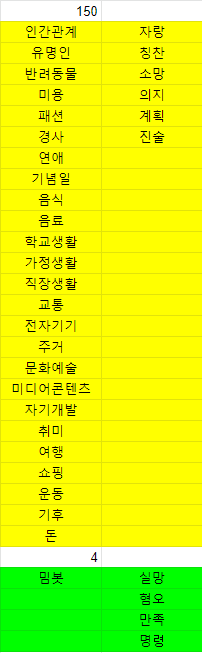

In [52]:
comparison = ['']
num = 0
num_list = []

for i in df.iterrows():
  comparison.append(i[1]['speech'])
  if comparison[-2] != '' and comparison[-2] != comparison[-1]:
    num += 1
  num_list.append(num)

In [56]:
num_list[-1]

1403

In [51]:
df['label'] = df.speech.swifter.apply(add_class)

UnboundLocalError: ignored